# Diabetes Dataset Analysis

**About Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

The objective is to predict based on diagnostic measurements whether a patient has diabetes.


**Content**

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1)


https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

Path to dataset files: /home/liubov/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read in the diabets.csv file as a DataFrame called df.

In [3]:
df = pd.read_csv('/home/liubov/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1/diabetes.csv')

Check the head of DataFrame, and check out its info() and describe() methods.

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We estimate how many cases with diabetes and without diabetes are in the dataset.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

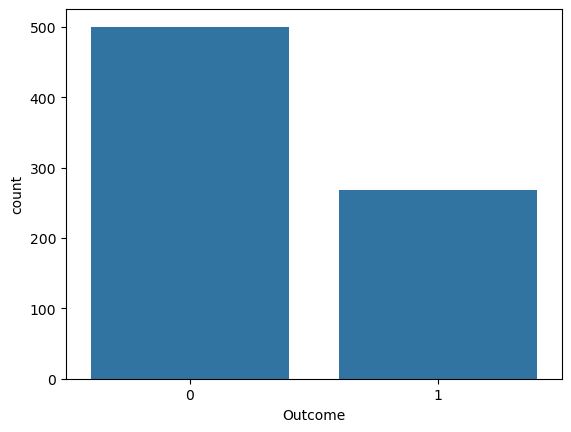

In [7]:
sns.countplot(x='Outcome',data=df)

**Dealing with missing data**

BMI - is body mass index. This is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres. 

This value can not be 0. So we have to check these values and discard the null values.


In [8]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Fill with median
for col in cols_with_zeros:
    df[col].fillna(df[col].median(), inplace=True)

Text(0.5, 0, 'Glucose')

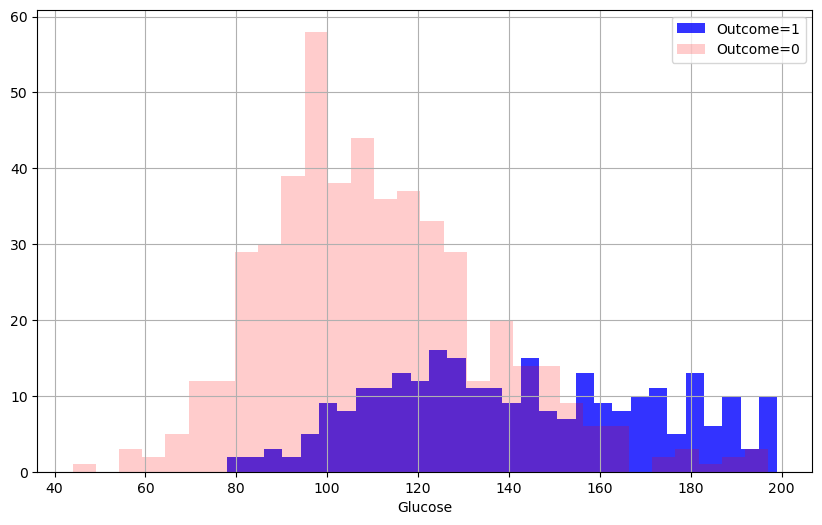

In [9]:
plt.figure(figsize=(10,6))
df[df['Outcome']==1]['Glucose'].hist(alpha=0.8,color='blue',
                                              bins=30,label='Outcome=1')
df[df['Outcome']==0]['Glucose'].hist(alpha=0.2,color='red',
                                              bins=30,label='Outcome=0')
plt.legend()
plt.xlabel('Glucose')

From the previous graph, we can see that we have <code>glucose</code> values close to zero. There are not many of them, so we can ignore them.

![image](https://149777215.v2.pressablecdn.com/wp-content/uploads/2021/03/Blood-Sugar-Chart.jpeg)
Source: https://www.diabetesselfmanagement.com/blog/what-is-a-normal-blood-sugar-level/

In [10]:
(df['Glucose'] < 20).sum()

0

In [11]:
df = df[(df['Glucose'] > 20)]

Now let's build histograms for <code>Insulin</code>.

Text(0.5, 0, 'Insulin')

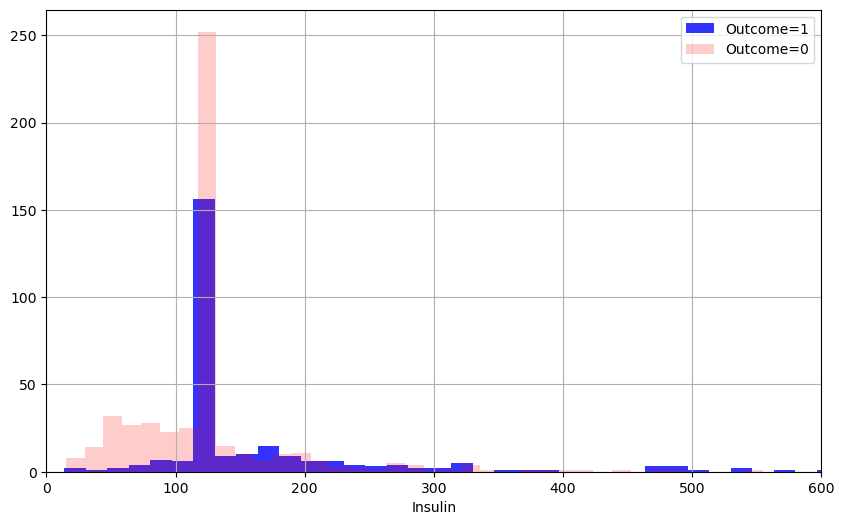

In [12]:
plt.figure(figsize=(10,6))
df[df['Outcome']==1]['Insulin'].hist(alpha=0.8,color='blue',
                                              bins=50,label='Outcome=1')
df[df['Outcome']==0]['Insulin'].hist(alpha=0.2,color='red',

                                     bins=50,label='Outcome=0')
plt.xlim(0, 600)
plt.legend()
plt.xlabel('Insulin')

In [13]:
(df['Insulin']==0).sum()

0

![image](https://thehealthymd.com/wp-content/uploads/2022/05/HOMA-IR-Infographic-TheHealthyMD_v2-01-425x1024.jpg)
Source:https://thehealthymd.com/homa-ir-calculator-for-insulin-resistance/

We have 332 zero insulin values. This is almost half of the dataset, so we cannot remove these values. We should probably refuse this column.

In [14]:
df = df.drop('Insulin', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,30.1,0.349,47,1


Сonsider the dependence of the diagnosis of diabetes depending on <code>age</code>.

/tmp/ipykernel_225778/503881603.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome',y='Age',data=df,palette='rainbow')


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

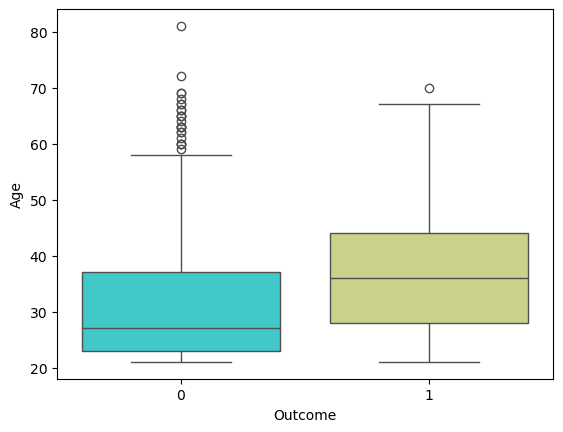

In [15]:
sns.boxplot(x='Outcome',y='Age',data=df,palette='rainbow')

Text(0.5, 0, 'Age')

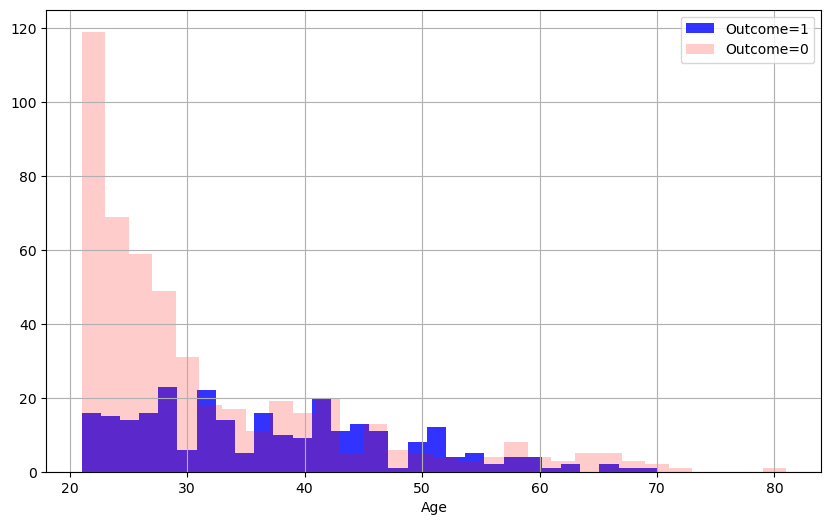

In [16]:
plt.figure(figsize=(10,6))
df[df['Outcome']==1]['Age'].hist(alpha=0.8,color='blue',
                                              bins=30,label='Outcome=1')
df[df['Outcome']==0]['Age'].hist(alpha=0.2,color='red',
                                              bins=30,label='Outcome=0')
plt.legend()
plt.xlabel('Age')

We can draw the following conclusions: among healthy people, there are more young people (from 20 to 30 years old), and we also do not observe an increase in the number of people with diabetes depending on age.

**Dependence of <code>pregnancies</code> and the presence of a diagnosis of diabetes**

Text(0.5, 0, 'Pregnancies')

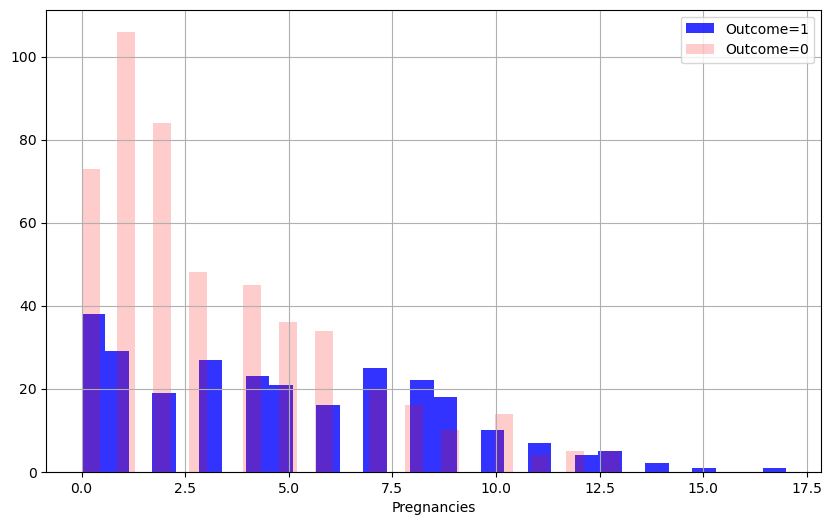

In [17]:
plt.figure(figsize=(10,6))
df[df['Outcome']==1]['Pregnancies'].hist(alpha=0.8,color='blue',
                                              bins=30,label='Outcome=1')
df[df['Outcome']==0]['Pregnancies'].hist(alpha=0.2,color='red',
                                              bins=30,label='Outcome=0')
plt.legend()
plt.xlabel('Pregnancies')

The situation is similar to <code>age</code>.

**Dependence of <code>BMI</code> and the presence of a diagnosis of diabetes**


Text(0.5, 0, 'BMI')

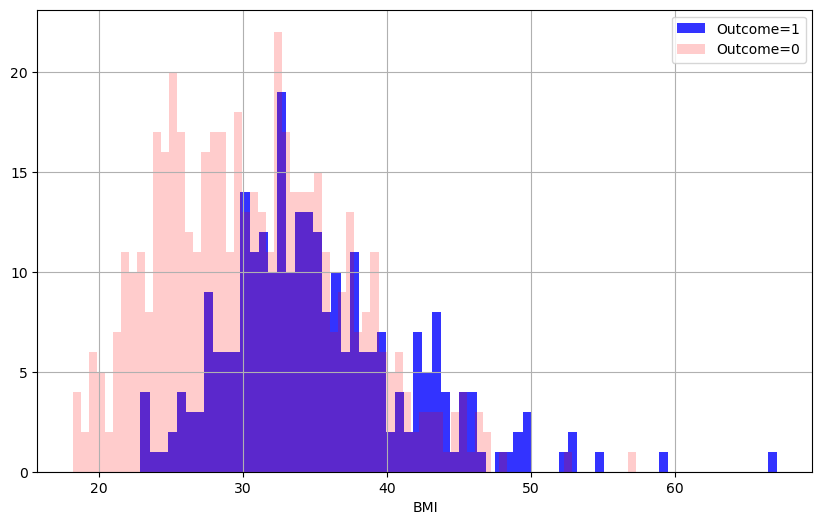

In [18]:
plt.figure(figsize=(10,6))
df[df['Outcome']==1]['BMI'].hist(alpha=0.8,color='blue',
                                              bins=70,label='Outcome=1')
df[df['Outcome']==0]['BMI'].hist(alpha=0.2,color='red',
                                              bins=70,label='Outcome=0')
plt.legend()
plt.xlabel('BMI')

We see that the average BMI of healthy people is lower than that of people who have been diagnosed with diabetes.

Let's use the BMI classification to determine how many people with diabetes suffer from obesity.

    If your BMI is less than 18.5, it falls within the underweight range.
    If your BMI is 18.5 to <25, it falls within the healthy weight range.
    If your BMI is 25.0 to <30, it falls within the overweight range.
    If your BMI is 30.0 or higher, it falls within the obesity range.

Obesity is frequently subdivided into categories:

    Class 1: BMI of 30 to < 35
    Class 2: BMI of 35 to < 40
    Class 3: BMI of 40 or higher. Class 3 obesity is sometimes categorized as “severe” obesity.
https://www.cdc.gov/obesity/basics/adult-defining.html

Text(0.5, 0, 'BMI')

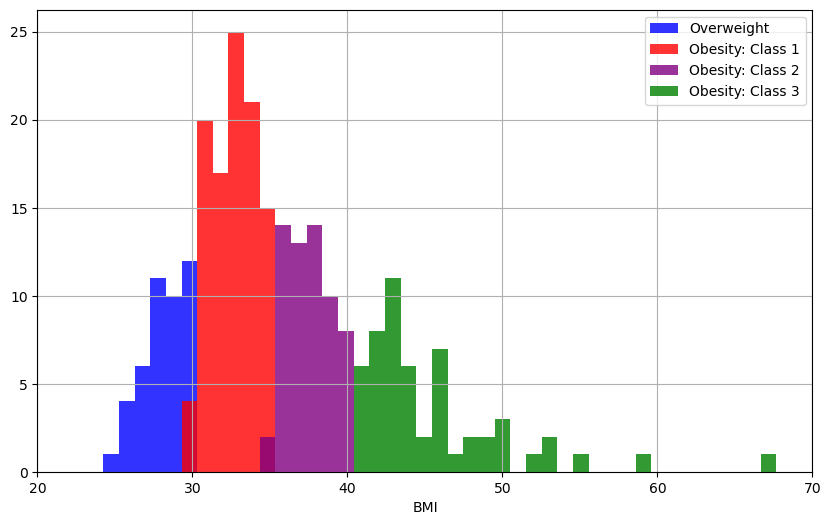

In [19]:
plt.figure(figsize=(10,6))
df[(df['Outcome']==1) & (df['BMI']>25) & (df['BMI']<=30)]['BMI'].hist(alpha=0.8,color='blue',
                                              bins=np.linspace(0, 100, 100),label='Overweight')
df[(df['Outcome']==1) & (df['BMI']>30) & (df['BMI']<=35)]['BMI'].hist(alpha=0.8,color='red',
                                              bins=np.linspace(0, 100, 100),label='Obesity: Class 1')
df[(df['Outcome']==1) & (df['BMI']>35) & (df['BMI']<=40)]['BMI'].hist(alpha=0.8,color='purple',
                                              bins=np.linspace(0, 100, 100),label='Obesity: Class 2')
df[(df['Outcome']==1) & (df['BMI']>40)]['BMI'].hist(alpha=0.8,color='green',
                                              bins=np.linspace(0, 100, 100),label='Obesity: Class 3')

plt.xlim(20, 70)
plt.legend()
plt.xlabel('BMI')

For convenience, we will mark BMI classes with numbers and create a new column <code>Obesity</code> in the dataframe.

In [20]:
df['Obesity']= 0

In [21]:
df.loc[(df['BMI']<=18.5),'Obesity'] = -2
df.loc[(df['BMI']>18.5) & (df['BMI']<=25),'Obesity'] = -1
df.loc[(df['BMI']>25) & (df['BMI']<=30),'Obesity'] = 0
df.loc[(df['BMI']>30) & (df['BMI']<=35),'Obesity'] = 1
df.loc[(df['BMI']>35) & (df['BMI']<=40),'Obesity'] = 2
df.loc[(df['BMI']>40),'Obesity'] = 3
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Obesity
0,6,148.0,72.0,35.0,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1,-1
3,1,89.0,66.0,23.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1,3


Next, we will analyze different stages of <code>Obesity</code> depending on <code>Age</code>.

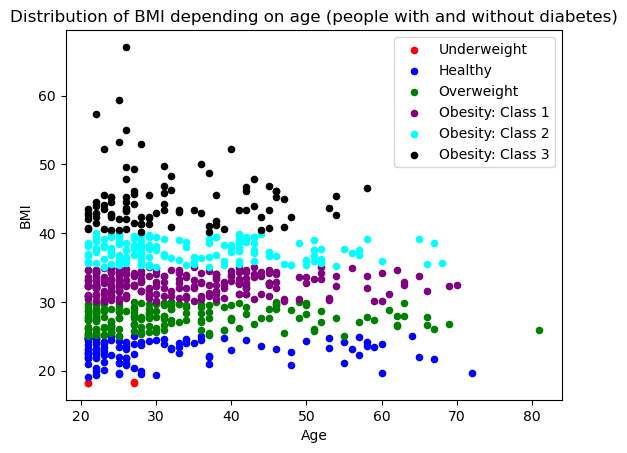

In [22]:
axis = plt.subplot()

df[df['Obesity']==-2].plot(x='Age', y='BMI', kind='scatter', color='red', ax=axis, label="Underweight")
df[df['Obesity']==-1].plot(x='Age', y='BMI', kind='scatter', color='blue', ax=axis, label='Healthy')
df[df['Obesity']==0].plot(x='Age', y='BMI', kind='scatter', color='green', ax=axis, label='Overweight')
df[df['Obesity']==1].plot(x='Age', y='BMI', kind='scatter', color='purple', ax=axis, label='Obesity: Class 1')
df[df['Obesity']==2].plot(x='Age', y='BMI', kind='scatter', color='cyan', ax=axis, label='Obesity: Class 2')
df[df['Obesity']==3].plot(x='Age', y='BMI', kind='scatter', color='black', ax=axis, label='Obesity: Class 3')

plt.title('Distribution of BMI depending on age (people with and without diabetes)')
plt.legend()

**Dependence of <code>Blood pressure</code> and the presence of a diagnosis of diabetes**

Text(0.5, 0, 'BloodPressure')

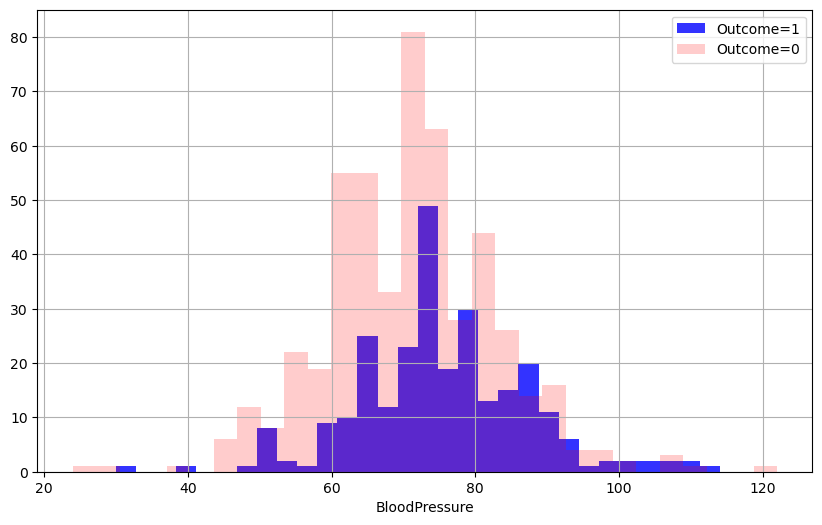

In [23]:
plt.figure(figsize=(10,6))
df[df['Outcome']==1]['BloodPressure'].hist(alpha=0.8,color='blue',
                                              bins=30,label='Outcome=1')
df[df['Outcome']==0]['BloodPressure'].hist(alpha=0.2,color='red',
                                              bins=30,label='Outcome=0')
plt.legend()
plt.xlabel('BloodPressure')

![image info](http://content.health.harvard.edu/wp-content/uploads/2021/11/bcaf1571-9128-4fc0-8354-52e157cb87d7.jpg)
https://www.health.harvard.edu/heart-health/reading-the-new-blood-pressure-guidelines

Text(0.5, 1.0, 'BloodPressure, people with diabet')

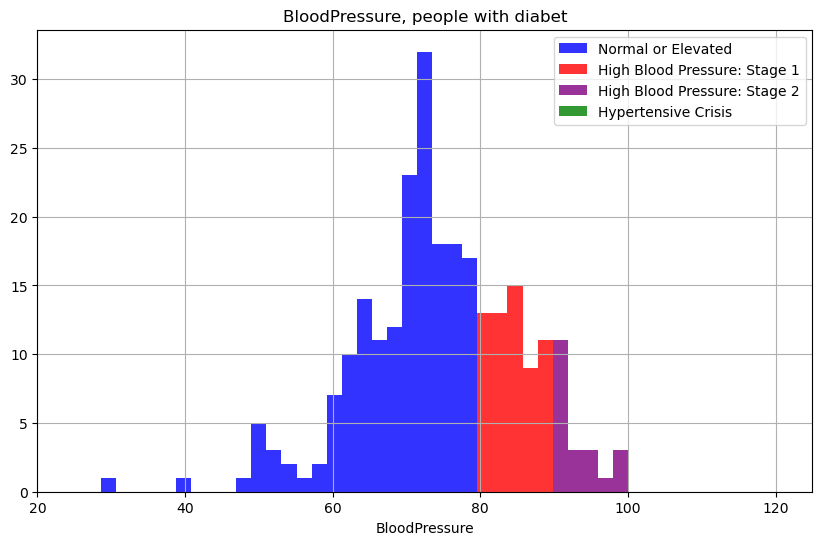

In [24]:
plt.figure(figsize=(10,6))
df[(df['Outcome']==1) & (df['BloodPressure']<80)]['BloodPressure'].hist(alpha=0.8,color='blue',
                                              bins=np.linspace(0, 100, 50),label='Normal or Elevated')
df[(df['Outcome']==1) & (df['BloodPressure']>=80) & (df['BloodPressure']<=89)]['BloodPressure'].hist(alpha=0.8,color='red',
                                              bins=np.linspace(0, 100, 50),label='High Blood Pressure: Stage 1')
df[(df['Outcome']==1) & (df['BloodPressure']>=90) & (df['BloodPressure']<=120)]['BloodPressure'].hist(alpha=0.8,color='purple',
                                              bins=np.linspace(0, 100, 50),label='High Blood Pressure: Stage 2')
df[(df['Outcome']==1) & (df['BloodPressure']>120)]['BloodPressure'].hist(alpha=0.8,color='green',
                                              bins=np.linspace(0, 100, 50),label='Hypertensive Crisis')

plt.xlim(20, 125)
plt.legend()
plt.xlabel('BloodPressure')
plt.title('BloodPressure, people with diabet')

Text(0.5, 1.0, 'BloodPressure, people without diabet')

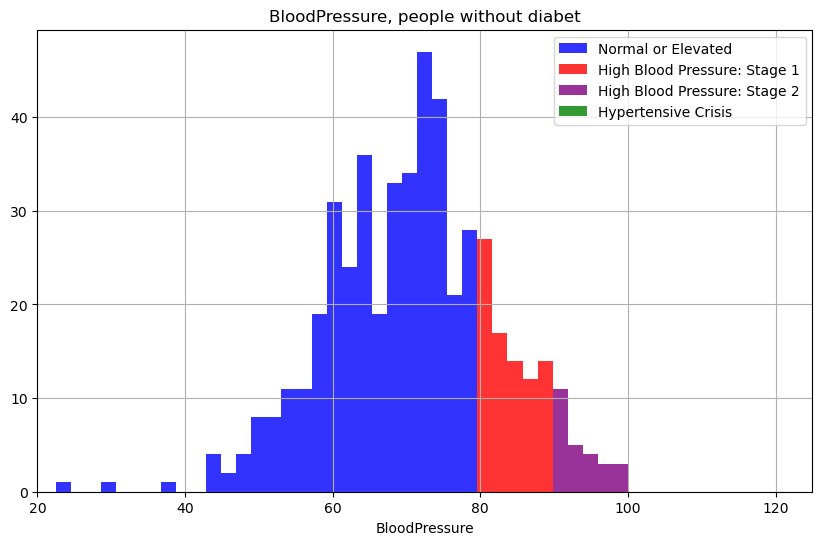

In [25]:
plt.figure(figsize=(10,6))
df[(df['Outcome']==0) & (df['BloodPressure']<80)]['BloodPressure'].hist(alpha=0.8,color='blue',
                                              bins=np.linspace(0, 100, 50),label='Normal or Elevated')
df[(df['Outcome']==0) & (df['BloodPressure']>=80) & (df['BloodPressure']<=89)]['BloodPressure'].hist(alpha=0.8,color='red',
                                              bins=np.linspace(0, 100, 50),label='High Blood Pressure: Stage 1')
df[(df['Outcome']==0) & (df['BloodPressure']>=90) & (df['BloodPressure']<=120)]['BloodPressure'].hist(alpha=0.8,color='purple',
                                              bins=np.linspace(0, 100, 50),label='High Blood Pressure: Stage 2')
df[(df['Outcome']==0) & (df['BloodPressure']>120)]['BloodPressure'].hist(alpha=0.8,color='green',
                                              bins=np.linspace(0, 100, 50),label='Hypertensive Crisis')

plt.xlim(20, 125)
plt.legend()
plt.xlabel('BloodPressure')
plt.title('BloodPressure, people without diabet')

**Dependence of <code>skin thickness</code> and the presence of a diagnosis of diabetes**

Text(0.5, 0, 'SkinThickness')

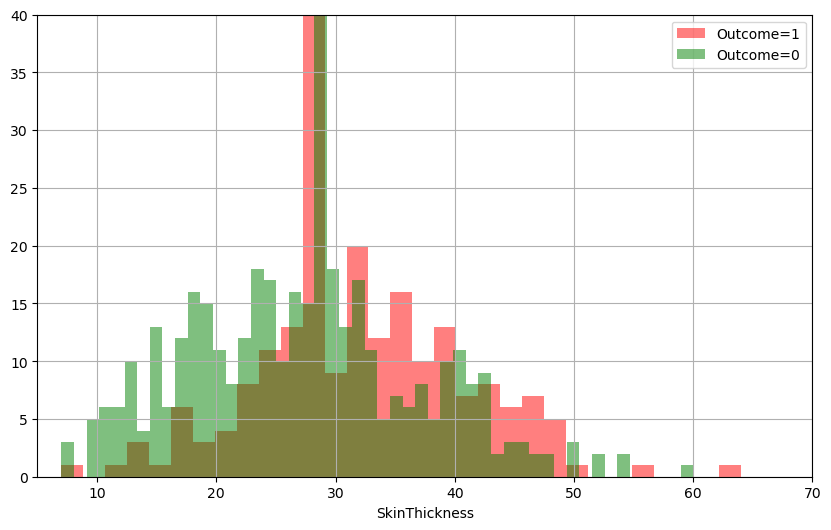

In [26]:
plt.figure(figsize=(10,6))
df[df['Outcome']==1]['SkinThickness'].hist(alpha=0.5,color='red',
                                              bins=50,label='Outcome=1')
df[df['Outcome']==0]['SkinThickness'].hist(alpha=0.5,color='green',
                                              bins=50,label='Outcome=0')
plt.xlim(5,70)
plt.ylim(0,40)
plt.legend()
plt.xlabel('SkinThickness')

**Dependence of <code>Diabetes Pedigree Function</code> and the presence of a diagnosis of diabetes**

Text(0.5, 0, 'DiabetesPedigreeFunction')

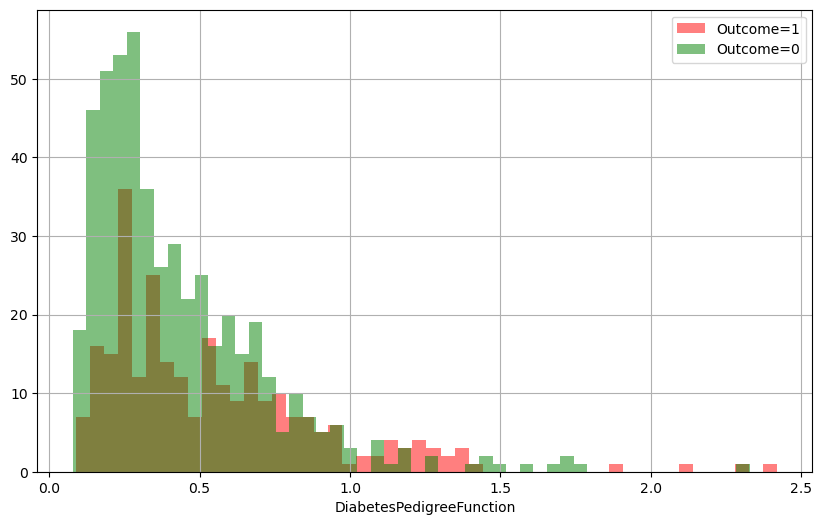

In [27]:
plt.figure(figsize=(10,6))
df[df['Outcome']==1]['DiabetesPedigreeFunction'].hist(alpha=0.5,color='red',
                                              bins=50,label='Outcome=1')
df[df['Outcome']==0]['DiabetesPedigreeFunction'].hist(alpha=0.5,color='green',
                                              bins=50,label='Outcome=0')
# plt.xlim(5,70)
# plt.ylim(0,40)
plt.legend()
plt.xlabel('DiabetesPedigreeFunction')

# Building multiple models and comparing them

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f"\n{name}")
    print(classification_report(y_test, preds))



Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154


Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        99
           1       0.57      0.60      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154


Random Forest
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77

# ROC curve and AUC

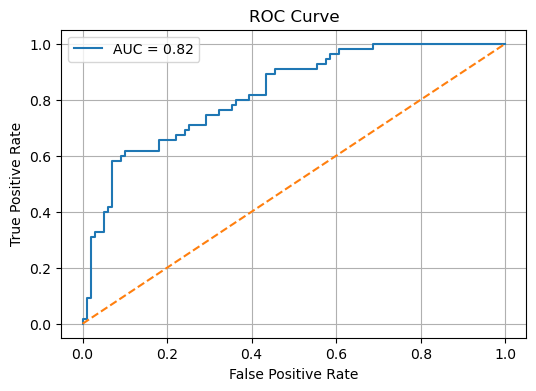

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# Feature importance

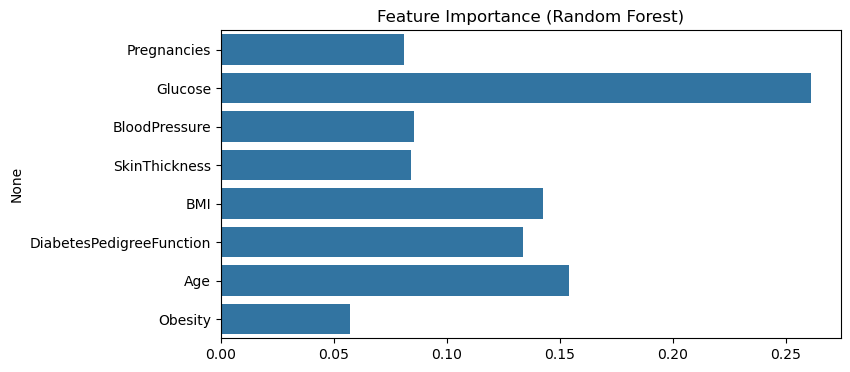

In [30]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()
